# Importing Libraries

In [62]:
!pip install -U scikit-learn==1.2.2 imbalanced-learn==0.10.1

In [63]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score ,confusion_matrix,classification_report
from tensorflow.keras import layers
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
import xgboost as xgb

import joblib

# Reading The Data

In [64]:
df = pd.read_csv("/kaggle/input/creditcardfraud/creditcard.csv")
df.head(20)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [65]:
df.duplicated().sum()

1081

In [66]:
df.drop_duplicates(inplace=True)

In [67]:
df.duplicated().sum()

0

In [68]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 283726 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     283726 

In [70]:
df.isnull().sum().sort_values(ascending=False)

Time      0
V16       0
Amount    0
V28       0
V27       0
V26       0
V25       0
V24       0
V23       0
V22       0
V21       0
V20       0
V19       0
V18       0
V17       0
V15       0
V1        0
V14       0
V13       0
V12       0
V11       0
V10       0
V9        0
V8        0
V7        0
V6        0
V5        0
V4        0
V3        0
V2        0
Class     0
dtype: int64

In [71]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

# Hadeling The Outliers

In [72]:
df['Class'].value_counts()

Class
0    283253
1       473
Name: count, dtype: int64

<Axes: xlabel='Amount'>

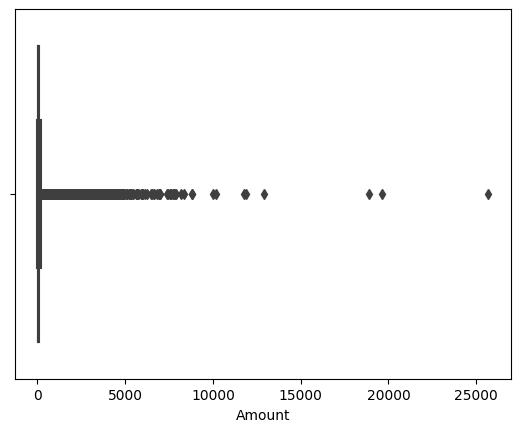

In [73]:
sns.boxplot(x=df['Amount'])

In [74]:
mean = df['Amount'].mean()
std = df['Amount'].std()

# Keep only values within 3 standard deviations
df_no_outliers = df[(df['Amount'] > mean - 3*std) & (df['Amount'] < mean + 3*std)]

In [75]:
Q1 = df['Amount'].quantile(0.25)
Q3 = df['Amount'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df_no_outliers = df[(df['Amount'] >= lower_bound) & (df['Amount'] <= upper_bound)]

In [76]:
# Separate fraud and non-fraud
fraud = df[df['Class'] == 1]
non_fraud = df[df['Class'] == 0]

# Calculate IQR on 'Amount' column of non-fraud data
Q1 = non_fraud['Amount'].quantile(0.25)
Q3 = non_fraud['Amount'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from non-fraud
non_fraud = non_fraud[(non_fraud['Amount'] >= lower_bound) & (non_fraud['Amount'] <= upper_bound)]

# Reassign df to the cleaned version
df = pd.concat([non_fraud, fraud], ignore_index=True)

In [77]:
df['Class'].value_counts()

Class
0    251632
1       473
Name: count, dtype: int64

# Visualization

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


Text(0, 0.5, 'Frequency')

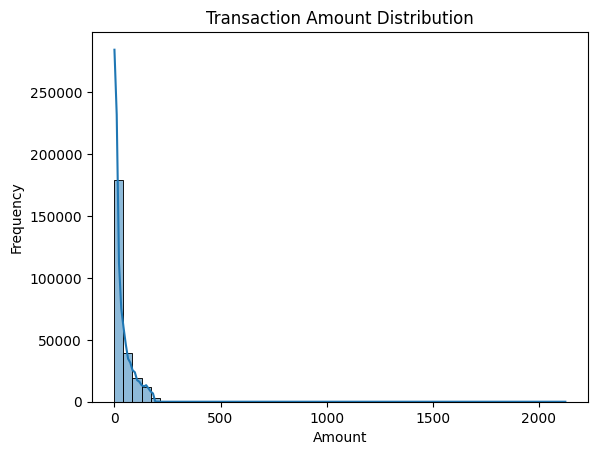

In [78]:
sns.histplot(df['Amount'], bins=50, kde=True)
plt.title('Transaction Amount Distribution')
plt.xlabel('Amount')
plt.ylabel('Frequency')

Text(0, 0.5, 'Amount')

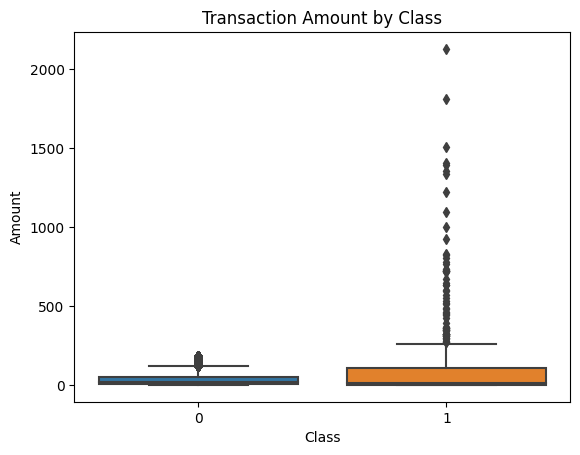

In [79]:
sns.boxplot(x='Class', y='Amount', data=df)
plt.title('Transaction Amount by Class')
plt.xlabel('Class')
plt.ylabel('Amount')

Text(0.5, 1.0, 'Transaction Amount over Time (by Class)')

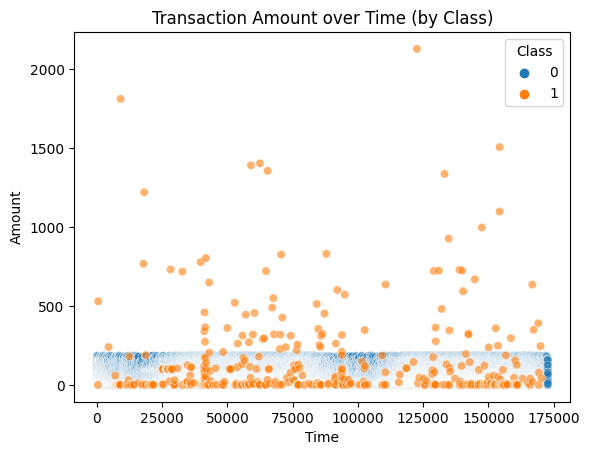

In [80]:
sns.scatterplot(x='Time', y='Amount', hue='Class', data=df, alpha=0.6)
plt.title('Transaction Amount over Time (by Class)')

Text(0.5, 1.0, 'Feature Correlation Heatmap')

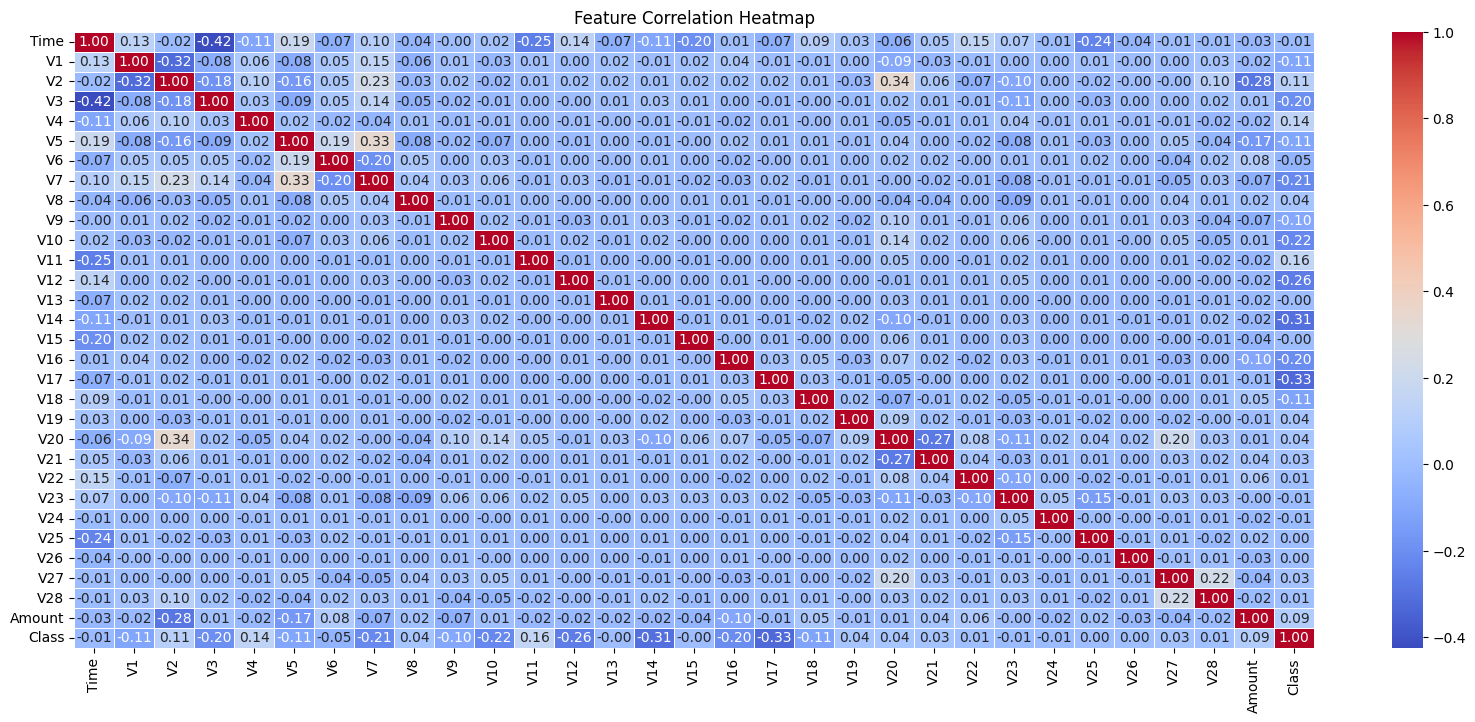

In [81]:
# Calculate correlation matrix
corr = df.corr()

# Plotting the heatmap
plt.figure(figsize=(20, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Heatmap')

# Splitting The Data

In [82]:
x = df.drop('Class',axis=1)
y = df['Class']

In [83]:
#changing x and y to dataframes
x=pd.DataFrame(x)
y=pd.DataFrame(y)

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x,y,
                                   test_size= 0.20, random_state=100, stratify=y)

# Scaling

In [85]:
scaler_X = MinMaxScaler(feature_range=(0,1))
x_train_scaled = scaler_X.fit_transform(x_train)
x_test_scaled  = scaler_X.transform(x_test)

joblib.dump(scaler_X,f'Scaling.joblib')

['Scaling.joblib']

# Machine Learning Models

In [86]:
models ={
    #'LogisticRegression' : LogisticRegression(),
    #'GaussianNB' : GaussianNB(),
    #'Decision Tree Classifier': DecisionTreeClassifier( max_depth=10,random_state=42),
    #'Random Forest Classifier': RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42),
    #'KNN Classifier': KNeighborsClassifier(n_neighbors=5),
    #'SVC': SVC(kernel='linear', C=1.0)
    'XGBoost':xgb.XGBClassifier(n_estimators = 5000, max_depth = 30, learning_rate = 0.01)
}

In [87]:
accuracy = []
conf_matrices = {}

from tqdm import tqdm
for model_name, model in tqdm(models.items()):
    # Train
    model.fit(x_train_scaled, y_train)


    # Predict once on train and once on test
    y_pred_train = model.predict(x_train_scaled)
    y_pred_test  = model.predict(x_test_scaled)
    
    # Compute train metrics
    acc_train      = accuracy_score(y_train, y_pred_train)
    pres_train     = precision_score(y_train, y_pred_train)
    recall_train   = recall_score(y_train, y_pred_train)
    f1_train       = f1_score(y_train, y_pred_train)
    
    # Compute test metrics
    acc_test       = accuracy_score(y_test, y_pred_test)
    pres_test      = precision_score(y_test, y_pred_test)
    recall_test    = recall_score(y_test, y_pred_test)
    f1_test        = f1_score(y_test, y_pred_test)

    # Store results
    accuracy.append([
        acc_train, pres_train, recall_train, f1_train,
        acc_test,  pres_test,  recall_test,  f1_test
    ])
    # Save confusion matrix for test set
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred_test)

    joblib.dump(model,f'Model.joblib')

100%|██████████| 1/1 [01:25<00:00, 85.77s/it]


In [88]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train",
                               "F1_Train","Acc_Test","pre_Test",
                               "Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
XGBoost,1.0,1.0,1.0,1.0,0.999544,0.939024,0.810526,0.870056


# Balancing

Text(0.5, 1.0, 'Class Distribution')

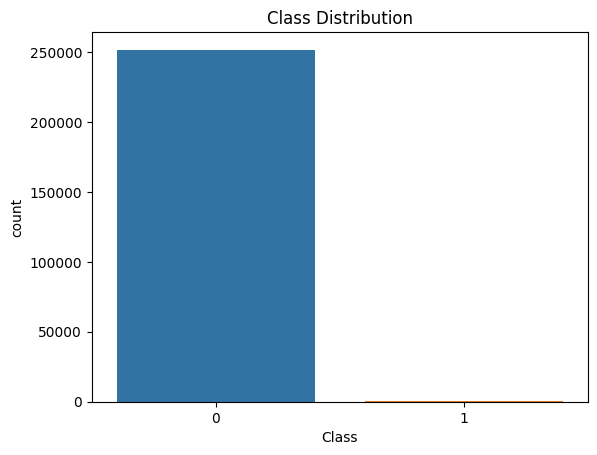

In [89]:
sns.countplot(data=df,x='Class')
plt.title("Class Distribution")

In [90]:
smote = SMOTE(random_state=42,sampling_strategy=0.1) #minority is 0.3 from majority
x_train_res, y_train_res = smote.fit_resample(x_train_scaled, y_train)

Text(0.5, 1.0, 'Class Distribution After Resampling')

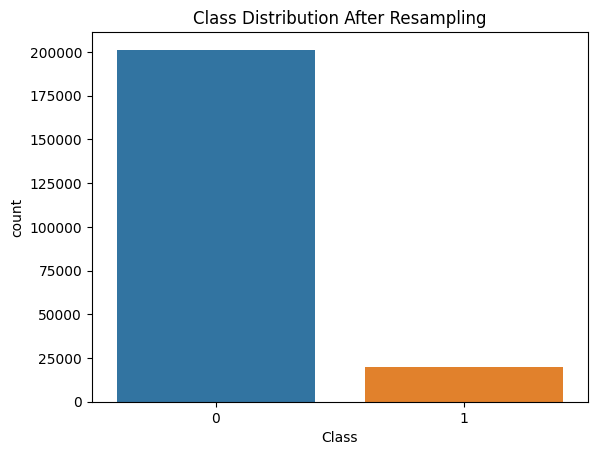

In [91]:
sns.countplot(data=y_train_res,x='Class')
plt.title("Class Distribution After Resampling")

**Modeling on the balanced data**

In [92]:
accuracy = []
conf_matrices = {}

from tqdm import tqdm
for model_name, model in tqdm(models.items()):
    # Train
    model.fit(x_train_res, y_train_res)


    # Predict once on train and once on test
    y_pred_train = model.predict(x_train_res)
    y_pred_test  = model.predict(x_test_scaled)
    
    # Compute train metrics
    acc_train      = accuracy_score(y_train_res, y_pred_train)
    pres_train     = precision_score(y_train_res, y_pred_train)
    recall_train   = recall_score(y_train_res, y_pred_train)
    f1_train       = f1_score(y_train_res, y_pred_train)

     # Compute test metrics
    acc_test       = accuracy_score(y_test, y_pred_test)
    pres_test      = precision_score(y_test, y_pred_test)
    recall_test    = recall_score(y_test, y_pred_test)
    f1_test        = f1_score(y_test, y_pred_test)
 
    # Store results
    accuracy.append([
        acc_train, pres_train, recall_train, f1_train,
        acc_test,  pres_test,  recall_test,  f1_test
    ])
    # Save confusion matrix for test set
    conf_matrices[model_name] = confusion_matrix(y_test, y_pred_test)

100%|██████████| 1/1 [02:09<00:00, 129.24s/it]


In [93]:
pd.DataFrame(accuracy,columns=["Acc_Train","Pre_Train","Rec_Train",
                               "F1_Train","Acc_Test","pre_Test",
                               "Rec_Test","F1_Test"],index=models.keys())

,Acc_Train,Pre_Train,Rec_Train,F1_Train,Acc_Test,pre_Test,Rec_Test,F1_Test
XGBoost,1.0,1.0,1.0,1.0,0.999346,0.816327,0.842105,0.829016


# Neural Network

In [94]:
# Split into Input and Output Elements

X_train_full, X_test,  y_train_full, y_test  = train_test_split(x, y,
    test_size=0.20, stratify=y, random_state=42)
X_train,      X_valid, y_train,       y_valid = train_test_split(
    X_train_full, y_train_full,
    test_size=0.10, stratify=y_train_full, random_state=42
)

print("X_train  = ",X_train.shape ," y_train = ", y_train.shape)
print("X_test   = ",X_test.shape ," y_test = ", y_test.shape)
print("X_valid  = ",X_valid.shape ," y_valid = ", y_valid.shape)

X_train  =  (181515, 30)  y_train =  (181515, 1)
X_test   =  (50421, 30)  y_test =  (50421, 1)
X_valid  =  (20169, 30)  y_valid =  (20169, 1)


In [95]:
# Fit scaler on TRAIN only, then transform all three sets
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)
X_test_scaled  = scaler.transform(X_test)

In [96]:
# Resample (SMOTE) **only** your scaled TRAIN set
smote = SMOTE(sampling_strategy=0.3, random_state=42) # minority is 0.3 if majority
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

In [97]:
model = Sequential([
    layers.Dense(  8, activation='relu', input_shape=(X_train_res.shape[1],)),
    layers.Dropout(0.4),
    layers.Dense(  1, activation='sigmoid')
])
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)
print(model.summary())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_2 (Dense)                      │ (None, 8)                   │             248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 8)                   │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │               9 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 257 (1.00 KB)

 Trainable params: 257 (1.00 KB)

 Non-trainable params: 0 (0.00 B)

None


In [98]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.003),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [99]:
# Training and evaluating the model
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(
    X_train_res, y_train_res,  # <-- FIXED: was X_train_1 and y_train
    epochs=50,
    batch_size=32,
    validation_data=(X_valid_scaled, y_valid),  # <-- FIXED: scaled val data
    callbacks=[early_stop]
)

Epoch 1/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 12s 1ms/step - accuracy: 0.9052 - loss: 0.2463 - val_accuracy: 0.9860 - val_loss: 0.0511
Epoch 2/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9502 - loss: 0.1652 - val_accuracy: 0.9919 - val_loss: 0.0231
Epoch 3/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9491 - loss: 0.1620 - val_accuracy: 0.9804 - val_loss: 0.0579
Epoch 4/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9497 - loss: 0.1565 - val_accuracy: 0.9905 - val_loss: 0.0313
Epoch 5/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9495 - loss: 0.1562 - val_accuracy: 0.9823 - val_loss: 0.0488
Epoch 6/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9499 - loss: 0.1545 - val_accuracy: 0.9915 - val_loss: 0.0226
Epoch 7/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9502 - loss: 0.1518 - val_accuracy: 0.9909 - val_loss: 0.0233
Epoch 8/50
7361/7361 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - accuracy: 0.9502 - loss: 0

1576/1576 ━━━━━━━━━━━━━━━━━━━━ 2s 969us/step

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.99      1.00     50326
           1       0.19      0.87      0.31        95

    accuracy                           0.99     50421
   macro avg       0.59      0.93      0.65     50421
weighted avg       1.00      0.99      1.00     50421

Confusion Matrix:
[[49971   355]
 [   12    83]]


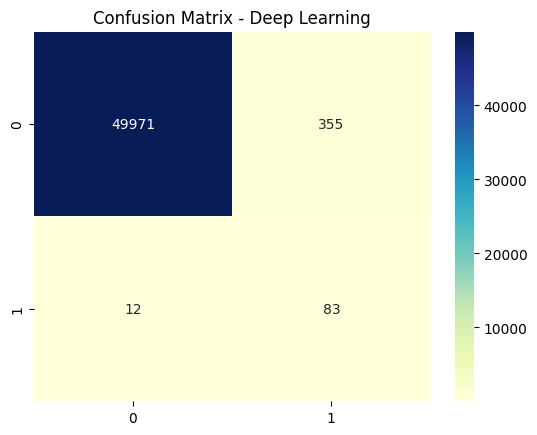

In [100]:
# Prediction
y_pred_prob = model.predict(X_test_scaled)  # <-- FIXED: scaled test data
y_pred = (y_pred_prob > 0.5).astype(int)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix - Deep Learning")
plt.show()

# Future Work

**We plan to focus on improving the model’s recall to catch more fraud cases, while making sure precision stays high to avoid too many false alarms. The goal is to have a model that can find most fraud without misclassifying too many normal transactions.**